In [1]:
import numpy as np
from sklearn import datasets

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:100, :2]  # 取前100个样本的前两个特征（这些样本只包括Setosa和Versicolor）
y = iris.target[:100]    # 取前100个样本的目标变量

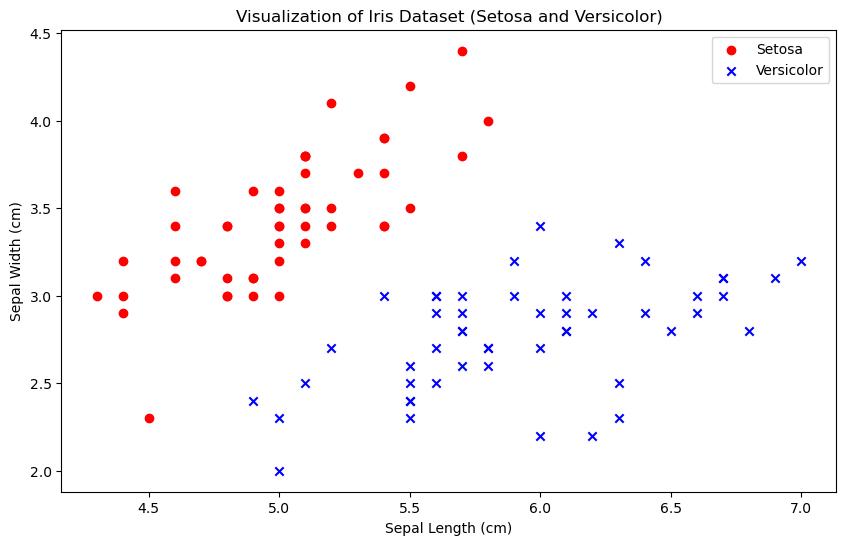

In [2]:
import matplotlib.pyplot as plt

# Visualize the dataset
plt.figure(figsize=[10,6])
# Plot Setosa samples
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Setosa')
# Plot Versicolor samples
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Versicolor')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='upper right')
plt.title('Visualization of Iris Dataset (Setosa and Versicolor)')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# 将数据集分成训练集和测试集，比例为8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出分割后的数据集大小
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((80, 2), (20, 2), (80,), (20,))

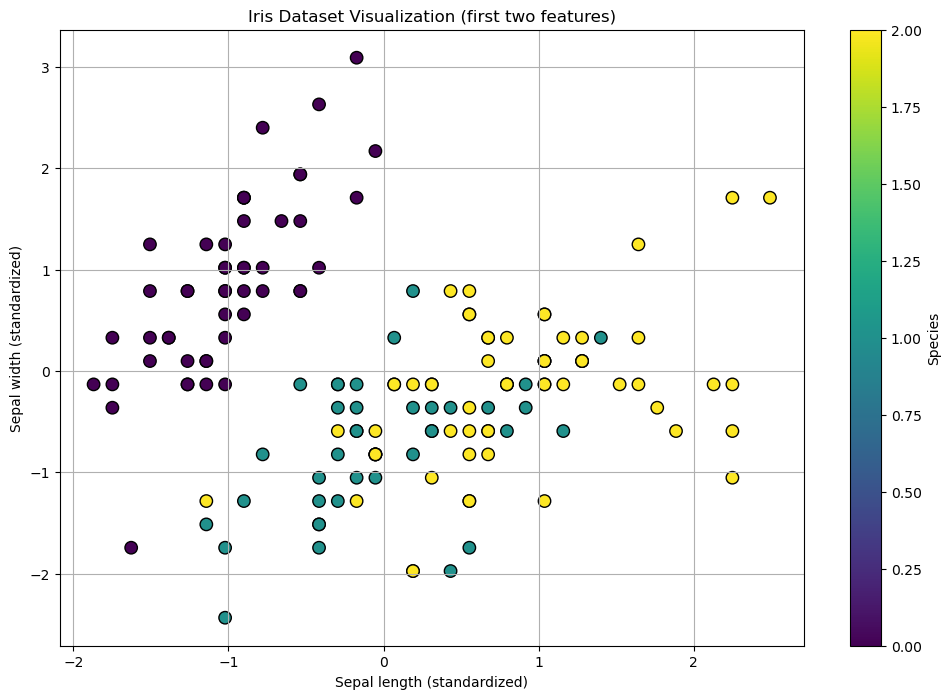

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# 加载Iris数据集
iris = datasets.load_iris()
X = iris.data  # 特征矩阵
y = iris.target  # 目标变量

# 预处理：标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 可视化数据集
plt.figure(figsize=(12, 8))
# 选择前两个特征进行可视化
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Iris Dataset Visualization (first two features)')
plt.colorbar(label='Species')
plt.grid(True)
plt.show()

In [22]:
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point  # 节点代表的数据点
        self.left = left  # 左子节点
        self.right = right  # 右子节点

class KDTree:
    def __init__(self):
        self.root = None

    def L(self, p1, p2):
        return np.linalg.norm(np.array(p1) - np.array(p2))

    def build_tree(self, points, depth=0):
        n = len(points)
        if n == 0:
            return None

        # 选择轴：根据当前深度选择维度
        axis = depth % len(points[0])

        # 排序并选择中位数点作为节点
        points.sort(key=lambda x: x[axis])
        median = n // 2

        # 递归创建子树
        return Node(
            point=points[median],
            left=self.build_tree(points[:median], depth + 1),
            right=self.build_tree(points[median + 1:], depth + 1)
        )

    def nearest_neighbor(self, root, point, depth=0, best=None):
        if root is None:
            return best

        axis = depth % len(point)
        next_best = None
        next_branch = None

        if best is None or self.L(root.point, point) < self.L(best, point):
            next_best = root.point
        else:
            next_best = best

        if point[axis] < root.point[axis]:
            next_branch = self.nearest_neighbor(root.left, point, depth + 1, next_best)
        else:
            next_branch = self.nearest_neighbor(root.right, point, depth + 1, next_best)

        if next_branch is not None and (best is None or self.L(next_branch, point) < self.L(best, point)):
            next_best = next_branch

        # 检查另一侧分支是否有更近的点
        if (best is None or np.abs(root.point[axis] - point[axis]) < self.L(best, point)): 
            if point[axis] < root.point[axis]:
                next_branch = self.nearest_neighbor(root.right, point, depth + 1, next_best)
            else:
                next_branch = self.nearest_neighbor(root.left, point, depth + 1, next_best)
            if next_branch is not None and (best is None or self.L(next_branch, point) < self.L(best, point)):
                next_best = next_branch

        return next_best


In [23]:
# 使用Iris数据集的前两个特征来创建一个KD树示例
kd_tree = KDTree()
root = kd_tree.build_tree(X_scaled[:, :2].tolist())  # 仅使用前两个特征构建KD树
root.point  # 显示树的根节点数据

[-0.052506077192250644, -0.8225697780975647]

In [37]:
# 随机选择查询点
np.random.seed(42)  # 确保结果可复现
random_indices = np.random.choice(X_scaled.shape[0], size=5, replace=False)
query_points = X_scaled[random_indices, :2]  # 只考虑前两个特征

perturbation = 0.1
random_noise = np.random.uniform(-perturbation, perturbation, query_points.shape)
perturbed_array = query_points + random_noise
perturbed_array

array([[ 0.26085598, -0.61029643],
       [-0.12256372,  1.65535428],
       [ 2.16507944, -1.09481625],
       [ 0.12207392, -0.27623672],
       [ 1.2207967 , -0.56569226]])

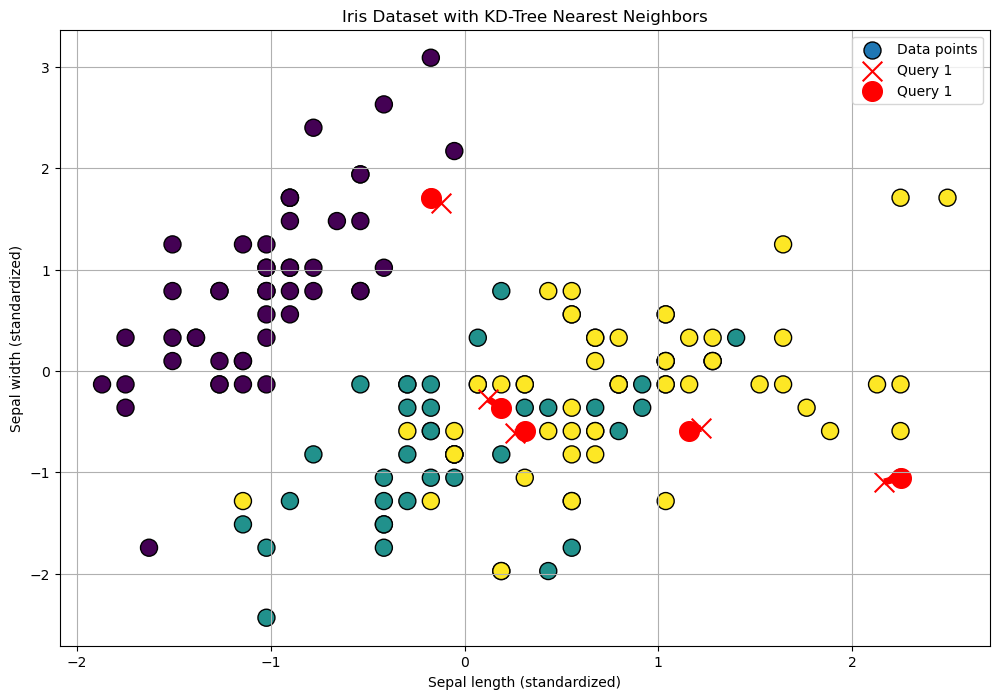

In [38]:
# 查找并可视化最近邻
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=150, label='Data points')
for i, point in enumerate(perturbed_array):
    nearest = kd_tree.nearest_neighbor(root, point.tolist())
    plt.scatter(point[0], point[1], c='red', marker='x', s=200, label=f'Query {i+1}' if i == 0 else None)  # 查询点
    plt.scatter(nearest[0], nearest[1], c='red', marker='o', s=200, label=f'Query {i+1}' if i == 0 else None)  # 查询点
    plt.plot([point[0], nearest[0]], [point[1], nearest[1]], 'r--', lw=5)  # 连接查询点和最近邻点

plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Iris Dataset with KD-Tree Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
random_array = np.random.uniform(-2.5, 2.5, query_points.shape)
random_array

array([[-1.28972364,  0.86067774],
       [ 1.30809808, -1.31181228],
       [ 1.14108174, -0.66108434],
       [ 0.66152915,  0.66764855],
       [ 0.17887342, -2.04855115]])

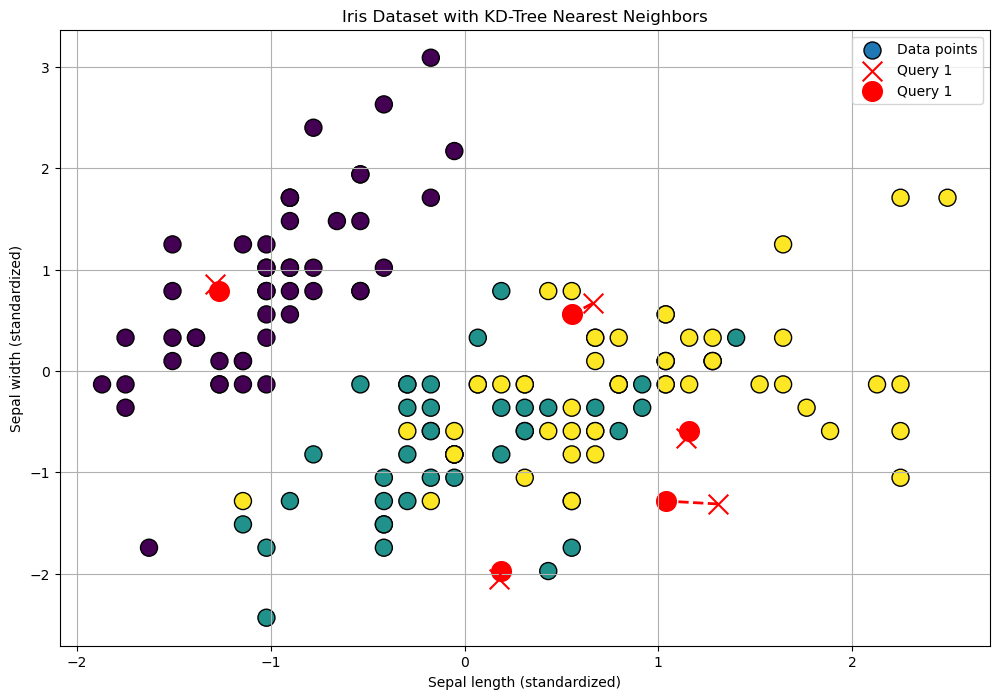

In [46]:
# 查找并可视化最近邻
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=150, label='Data points')
for i, point in enumerate(random_array):
    nearest = kd_tree.nearest_neighbor(root, point.tolist())
    plt.scatter(point[0], point[1], c='red', marker='x', s=200, label=f'Query {i+1}' if i == 0 else None)  # 查询点
    plt.scatter(nearest[0], nearest[1], c='red', marker='o', s=200, label=f'Query {i+1}' if i == 0 else None)  # 查询点
    plt.plot([point[0], nearest[0]], [point[1], nearest[1]], 'r--', lw=2)  # 连接查询点和最近邻点

plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Iris Dataset with KD-Tree Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = np.array([[5, 12, 1], [6, 21, 0], [14, 5, 0], [16, 10, 0], [13, 19, 0],
                 [13, 32, 1], [17, 27, 1], [18, 24, 1], [20, 20, 0], [23, 14, 1],
                 [23, 25, 1], [23, 31, 1], [26, 8, 0], [30, 17, 1],
                 [30, 26, 1], [34, 8, 0], [34, 19, 1], [37, 28, 1]])
X_train = data[:, 0: 2]
y_train = data[:, 2]

models = (KNeighborsClassifier(n_neighbors=1, n_jobs=-1), KNeighborsClassifier(n_neighbors=18, n_jobs=3))
t0 = time.time()
models = (clf.fit(X_train, y_train) for clf in models)
t1 = time.time()
t1 - t0

7.891654968261719e-05

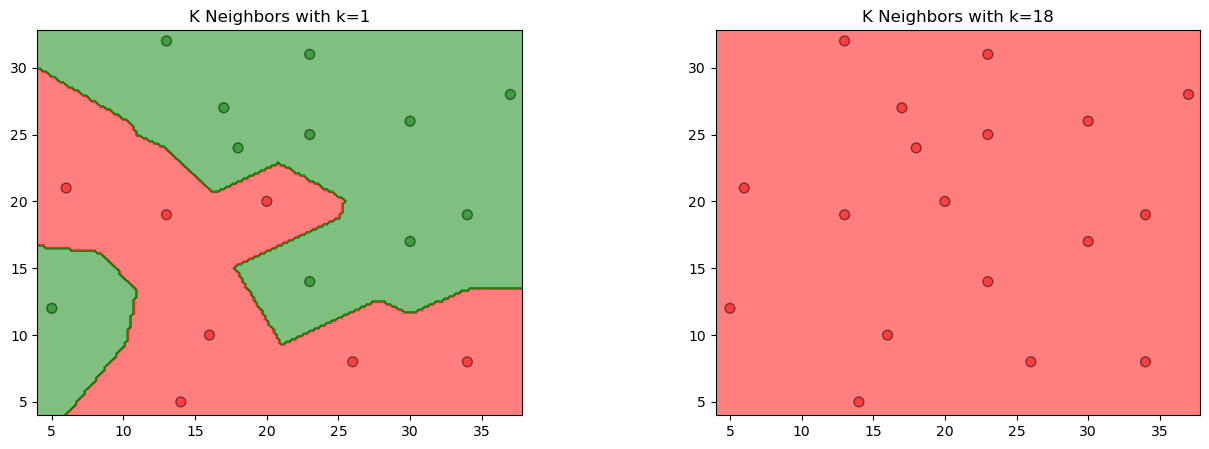

In [58]:
titles = ('K Neighbors with k=1', 'K Neighbors with k=18')

fig = plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

for clf, title, ax in zip(models, titles, fig.subplots(1, 2).flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Z))])

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    ax.scatter(X0, X1, c=y_train, s=50, edgecolors='k', cmap=cmap, alpha=0.5)
    ax.set_title(title)

plt.show()